In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve

In [156]:
start = dt.datetime.now() - dt.timedelta(days=1000)
end = dt.datetime.now()

In [211]:
df = web.DataReader("KTOS", 'yahoo', start, end)

In [212]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-10,8.00,7.80,7.83,7.84,988100,7.84
2017-04-11,7.97,7.75,7.81,7.95,1022900,7.95
2017-04-12,7.97,7.57,7.93,7.59,981700,7.59
2017-04-13,7.63,7.37,7.55,7.39,1269600,7.39
2017-04-17,7.54,7.38,7.41,7.51,880900,7.51


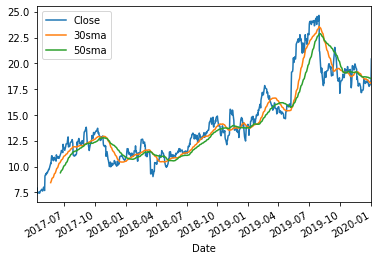

In [213]:
df['30sma'] = df['Close'].rolling(window=30).mean()
df['50sma'] = df['Close'].rolling(window=50).mean()
df[['Close', '30sma', '50sma']].plot()
plt.show()

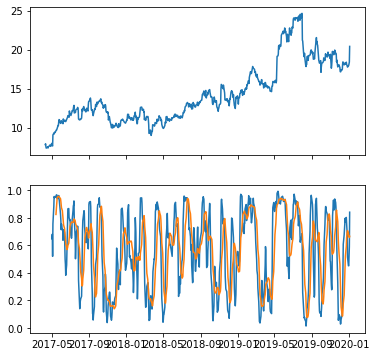

In [214]:
k_period = 3
d_period = 10

df['low30'] = df['Low'].rolling(window=14).min()
df['high30'] = df['High'].rolling(window=14).max()
df['slow_stoch'] = (df['Close'] - df['low30']).rolling(window=k_period).sum() / (df['high30'] - df['low30']).rolling(window=3).sum()
df['slow_stoch_3ma'] = df['slow_stoch'].rolling(window=d_period).mean()


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ax[0].plot(df.index, df['Close'])
ax[1].plot(df.index, df['slow_stoch'])
ax[1].plot(df.index, df['slow_stoch_3ma'])
plt.show()

In [215]:
df['close_diff'] = df['Close'].shift(-1) - df['Close']
df['slow_stoch_diff'] = df['slow_stoch'] - df['slow_stoch'].shift()
df['slow_stoch_3ma_diff'] = df['slow_stoch_3ma'] - df['slow_stoch_3ma'].shift()

In [216]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,30sma,50sma,low30,high30,slow_stoch,slow_stoch_3ma,close_diff,slow_stoch_diff,slow_stoch_3ma_diff
Date,,,,,,,,,,,,,,,
2019-12-27,18.020000,17.750000,17.980000,17.77,791800,17.77,18.219333,18.5908,17.240000,18.610001,0.516666,0.708288,0.15,-0.162967,0.008872
2019-12-30,18.240000,17.510000,18.240000,17.92,733200,17.92,18.162333,18.5676,17.240000,18.610001,0.452555,0.692639,0.09,-0.064112,-0.015649
2019-12-31,18.120001,17.709999,17.900000,18.01,610800,18.01,18.097667,18.5446,17.459999,18.610001,0.452442,0.670033,0.41,-0.000112,-0.022606
2020-01-02,18.440001,18.020000,18.059999,18.42,776300,18.42,18.058333,18.5258,17.510000,18.610001,0.591160,0.658015,2.00,0.138718,-0.012018
2020-01-03,20.450001,18.809999,18.990000,20.42,2660749,20.42,18.090667,18.5528,17.510000,20.450001,0.842004,0.666813,NaN,0.250843,0.008798


In [217]:
lr = LogisticRegression()

In [218]:
df2 = df.dropna(subset=['slow_stoch', '30sma'])

df2['slow_stoch_above'] = df2['slow_stoch'] - df2['slow_stoch_3ma']
df2['close_above'] = df2['Close'] - df2['30sma']

x = df2[['slow_stoch_diff', 'slow_stoch_above', 'close_above']]
y = df2['close_diff'] > 0

C:\Users\carte\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\carte\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [219]:
lr.fit(x, y)

C:\Users\carte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
y_pred = lr.predict_proba(x)[:, 1]

In [221]:
fpr, tpr, thresholds = roc_curve(y, y_pred) 

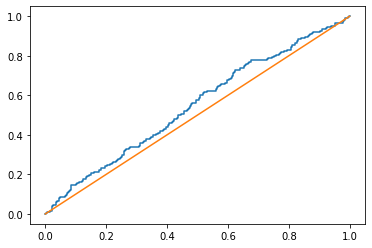

In [222]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()